## Introduction to Comet ML  

Comet is a great tool for model versioning and experimentation as it records the parameters and conditions from each of your experiements- allowing you to reproduce your results, or go back to a previous version of your experiment.  

To create an account, visit https://www.comet.ml/  
Follow the instructions for a single user account. Once that is created, you will see a project folder. That is where the records of your experiments can be viewed. 

Comet has an abundance of tutorials and scripts, we're just going to run through this notebook to get you started on the right track. For this illustration, we will be using one of the examples found on the Comet ML GitHub repo.

To begin with, you should install as illustrated below if you don't already have it. *Always import Experiment at the top of your notebook/script.*


In [2]:
!pip install comet_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 353 kB 5.3 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 552 kB 56.8 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=0b4291d3d7c7ed550de3cc8e19f1a2770bde7b949341e3dcb222f21db9e9e832
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


In [3]:
from comet_ml import Experiment

In [4]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="g4lnO5loqpjZChI9ThE9L3ebw",
    project_name="general",
    workspace="mohau45",
)

# Run your code and go to /

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Failed to calculate active processors count. Fall back to default CPU count 1
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/mohau45/general/25f07424b059474792ec0db1a8257d32



You will see an API key button at the top of the page when you click on an experiment- use this key as illustrated below to link your current workspace to comet. (If a project is empty, the code below will autogenerate for you on the project page, just copy and paste it in here)

Import the rest of your necessary libraries as you usually would. For this demonstration we will be using the breast cancer dataset for classification so we will also import that from sklearn.

In [5]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [6]:
# Have a look at your dataset
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))
print("Shape of cancer data: {}\n".format(cancer.data.shape))
print("Sample counts per class:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("\nFeature names:\n{}".format(cancer.feature_names))

cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of cancer data: (569, 30)

Sample counts per class:
{'malignant': 212, 'benign': 357}

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Split your data into train and test sets, keep in mind that you need to set a random state for your results to be reproduced!

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=7)

In [8]:
# Scale your data!

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## GridSearch 

For this example we've used a gridsearch but you may use a model with default parameters or your own parameters too- Just remember to add/remove the neccesary data when you are logging your parameters at the end of the experiment.

The `param_grid` variable contains the 'C' values we want our gridsearch to iterate through.



In [9]:
logreg = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100]}

In [10]:
# Training and testing using GridSearch
clf = GridSearchCV(logreg,
                   param_grid=param_grid,
                   cv=10,
                   n_jobs=-1)

clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

## Results

Now that our model has trained, we can have a look at the results- Below is a confusion matrix indicating that at first glance, we have a fairly good model going. We then save the F1 score, Precision, and Recall as individual variables to go into our metric dictionary for logging.

P.S. have a look at the Comet tutorial page for interesting confusion matrix plots.

In [11]:
print("\nResults\nConfusion matrix \n {}".format(
    confusion_matrix(y_test, y_pred)))


Results
Confusion matrix 
 [[52  1]
 [ 2 88]]


In [12]:
# Saving each metric to add to a dictionary for logging

f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [13]:
# Create dictionaries for the data we want to log

params = {"random_state": 7,
          "model_type": "logreg",
          "scaler": "standard scaler",
          "param_grid": str(param_grid),
          "stratify": True
          }
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision
           }

In [14]:
# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)

If you're using comet within a jupyter notebook, it's important to end your experiment when you've finished as illustrated below.

In [15]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/mohau45/general/25f07424b059474792ec0db1a8257d32
COMET INFO:   Metrics:
COMET INFO:     f1        : 0.9832402234636872
COMET INFO:     precision : 0.9887640449438202
COMET INFO:     recall    : 0.9777777777777777
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1bxpfLyGkjZf6yJx_WRVdnwwQkY1thRG5
COMET INFO:   Parameters:
COMET INFO:     C                            : 1
COMET INFO:     class_weight                 : 1
COMET INFO:     copy                         : True
COMET INFO:     cv                           : 10
COMET INFO:     dual                         : False
COMET INFO:     error_score                  : nan
COMET INFO:     estimator                    : LogisticRegression()
COMET INF

## Display  

Running `experiment.display()` will show you your experiments comet.ml page inside your notebook as illustrated below. You can do this immediately after an experiment is run, and logged. 

In [16]:
experiment.display()

# ***Advanced Classification Predict***

# **Predict Overview: 2022 Climate Change Belief Analysis**

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.






# **Problem statement**




  Build a robust Machine Learning Model that will be able to predict a person’s belief in Climate Change based on their Tweet Data, allowing companies to gain access into customer sentiment.

---
The business problem we are pitching to solve involves a fictional line of clothing sourced from sustainable and/or recycled sources that Woolworths is considering investing in. This will likely require a significant amount of capital expenditure and risk, with the need for novel material sourcing and production techniques likely increasing costs further. We are offering a machine learning platform that can determine customer sentiment about climate change based on tweets, large numbers of users and/or customers who express their belief that climate change is real and caused by humans may be significantly more likely to pay attention to (and consider purchasing) this new line of clothing if it were launched.



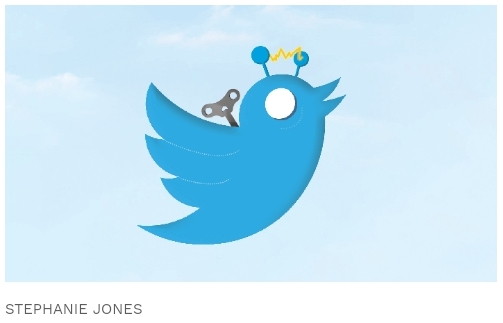

#  **Table of Contents**

1. Importing Packages

2. Loading Data

3. Exploratory Data Analysis (EDA)

4. Data Engineering

5. Modeling

6. Model Performance

7. Model Explanations

# 1. **Importing Packages**

Back to Table of Contents

In [ ]:
# !pip install fastText
# !pip install langdetect
# !pip install contractions
# !pip install scikit-plot

In [ ]:
#!pip install wordcloud

In [ ]:
import comet_ml
from comet_ml import Experiment

In [ ]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import ListedColormap
%matplotlib inline

# imports for Natural Language  Processing
import re
import os
import nltk
import time
import numpy as np
import pandas as pd
#import xgboost
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')

# Classification Models

from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB

# Performance Evaluation
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
#from scikitplot.metrics import plot_roc, plot_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Import library for train test split
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

#Resampling techniques -- not used here, but did try them.
from collections import Counter 
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

#spacy
#spacy.cli.download('en_core_web_sm')

# 2. **Loading the Data**

Back to Table of Contents

# 3. **Exploratory Data Analysis (EDA)**

Determine what parameters our dataset consists of:

Getting info about the dataframe e.g datatype,number of columns, missing values:

Calculating the number of missing values:

Determining the number of unique values in each column:

Determine the number of tweets for each sentiment as well as percentages

Making a copy of the dataframe

Determine the distribution of our target variable and if there is class imbalance.

Numeric keys aren't the most user-friendly, lets change the to text labels

Different graph to visualize distribution of tweets by sentiment, made using seaborn

Determine what the most common words in the dataset:

Visualise above table with a bar chart:

Created a function that determines the top 20 unique words for each of the sentiments:

# 4.**Data Engineering**